In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# creating the weight and bias.
# The defined variables will be initialized to zero.
W = tf.Variable(0.0, name="weights")
b = tf.Variable(1.0, name="bias")

In [3]:
X = tf.placeholder(tf.float32, name="X")
Y = tf.placeholder(tf.float32, name="Y")

In [4]:
for v in tf.global_variables():
    print(v)

<tf.Variable 'weights:0' shape=() dtype=float32_ref>
<tf.Variable 'bias:0' shape=() dtype=float32_ref>


In [5]:
for  n in tf.get_default_graph().as_graph_def().node:
    print(n.name)

weights/initial_value
weights
weights/Assign
weights/read
bias/initial_value
bias
bias/Assign
bias/read
X
Y


In [6]:
X

<tf.Tensor 'X:0' shape=<unknown> dtype=float32>

In [7]:
W

<tf.Variable 'weights:0' shape=() dtype=float32_ref>

In [8]:
Y_p = X * W + b

In [9]:
for  n in tf.get_default_graph().as_graph_def().node:
    print(n.name)

weights/initial_value
weights
weights/Assign
weights/read
bias/initial_value
bias
bias/Assign
bias/read
X
Y
mul
add


In [10]:
Y_p

<tf.Tensor 'add:0' shape=<unknown> dtype=float32>

In [11]:
loss = tf.squared_difference(Y, Y_p)

In [12]:
train_op = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [14]:
with tf.Session() as sess:

    # Initialize the variables[w and b].
    sess.run(tf.global_variables_initializer())
    print b.eval()
    #print X.eval()

1.0


In [18]:
with tf.Session() as sess:

    # Initialize the variables[w and b].
    sess.run(tf.global_variables_initializer())

    # Step 8: train the model
    for epoch_num in range(26): # run 100 epochs
        for x, y in data:
          
            # Session runs train_op to minimize loss
            loss_value,_ = sess.run([loss,train_op], feed_dict={X: x, Y: y})

            # Displaying the loss per epoch.
        print('epoch %d, loss=%f' %(epoch_num+1, loss_value))

        # save the values of weight and bias
        wcoeff, bias = sess.run([W, b])
        print (wcoeff)

epoch 1, loss=11.646643
2.9479246
epoch 2, loss=10.004311
2.9126456
epoch 3, loss=8.525454
2.8783038
epoch 4, loss=7.199423
2.8448746
epoch 5, loss=6.016232
2.812334
epoch 6, loss=4.966435
2.7806575
epoch 7, loss=4.041136
2.749823
epoch 8, loss=3.231968
2.719808
epoch 9, loss=2.531025
2.6905906
epoch 10, loss=1.930911
2.6621492
epoch 11, loss=1.424616
2.634464
epoch 12, loss=1.005573
2.6075137
epoch 13, loss=0.667588
2.5812802
epoch 14, loss=0.404847
2.5557437
epoch 15, loss=0.211871
2.5308855
epoch 16, loss=0.083514
2.5066879
epoch 17, loss=0.014941
2.4831336
epoch 18, loss=0.001607
2.4602048
epoch 19, loss=0.039243
2.4378858
epoch 20, loss=0.123840
2.4161594
epoch 21, loss=0.251635
2.3950105
epoch 22, loss=0.419099
2.3744233
epoch 23, loss=0.622924
2.3543832
epoch 24, loss=0.859983
2.334876
epoch 25, loss=1.127391
2.3158872
epoch 26, loss=1.422405
2.2974026


In [16]:
# Data file provided by the Stanford course CS 20SI: TensorFlow for Deep Learning Research.
# https://github.com/chiphuyen/tf-stanford-tutorials
DATA_FILE = "fire_theft.xls"
import xlrd
# read the data from the .xls file.
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
num_samples = sheet.nrows - 1

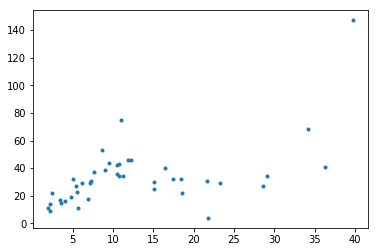

In [17]:
plt.plot(data[:,0],data[:,1],'.')

In [20]:
Prediction_values = data[:,0] * wcoeff + bias

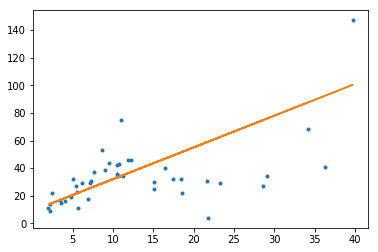

In [21]:
plt.plot(data[:,0],data[:,1],'.')
plt.plot(data[:,0],Prediction_values)